In [1]:
import pandas as pd
from datetime import datetime
import dask.dataframe as dd
import numpy as np
%matplotlib inline

In [2]:
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        'click_id'      : 'uint32'
        }

In [3]:
data = dd.read_csv('train.csv',dtype=dtypes,low_memory=False)

In [4]:
data.head(20)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
5,18787,3,1,16,379,2017-11-06 14:36:26,NaN,0
6,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
7,114221,3,1,19,379,2017-11-06 14:37:59,NaN,0
8,165970,3,1,13,379,2017-11-06 14:38:10,NaN,0
9,74544,64,1,22,459,2017-11-06 14:38:23,NaN,0


In [6]:
data.is_attributed.value_counts().compute()

0    184447044
1       456846
Name: is_attributed, dtype: int64

In [7]:
len(data.app.unique()) #706

706

In [8]:
len(data.device.unique()) #3475

3475

In [9]:
len(data.ip.unique()) #277396

277396

In [10]:
len(data.channel.unique()) #202

202

In [11]:
len(data.os.unique()) #800

800

In [11]:
clicked_data = data[data.is_attributed==1]

In [20]:
from datetime import datetime
def tim_diff(row):
    x1= row['click_time']
    x2 = row['attributed_time']
    fmt = '%Y-%m-%d %H:%M:%S'
    tstamp1 = datetime.strptime(x1, fmt)
    tstamp2 = datetime.strptime(x2, fmt)
    td = tstamp2 - tstamp1
    td_mins = int(round(td.total_seconds() / 60.))
    return td_mins

In [7]:
clicked_data['att_diff']  = clicked_data.apply(tim_diff,axis=1,meta=('x', str))

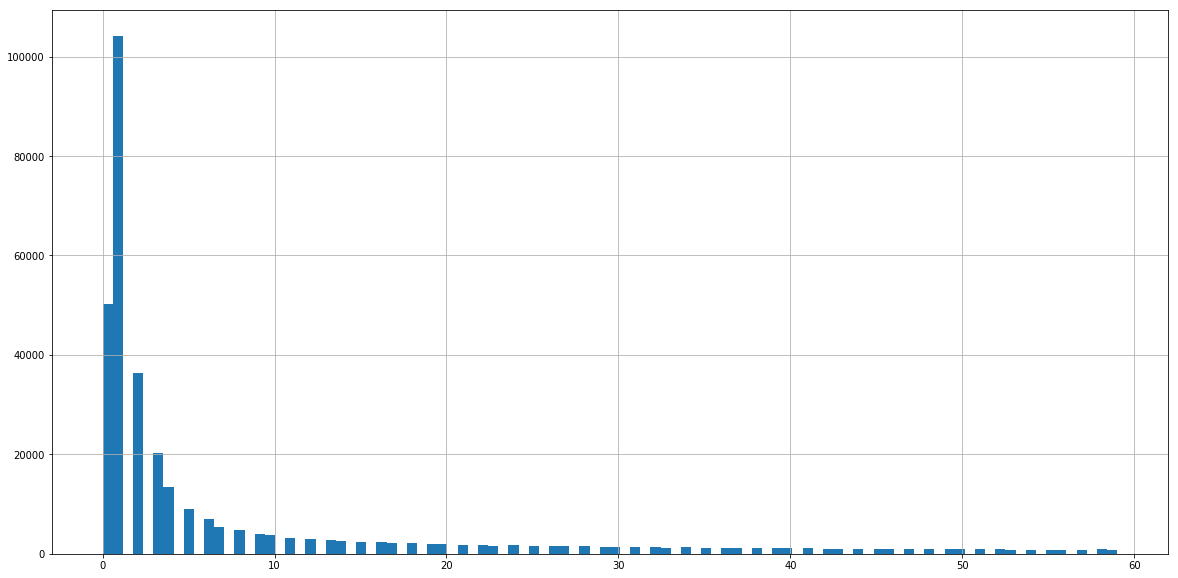

In [74]:
clicked_data[clicked_data.att_diff.astype(int)<60].att_diff.compute().hist(bins =100, figsize=(20,10))

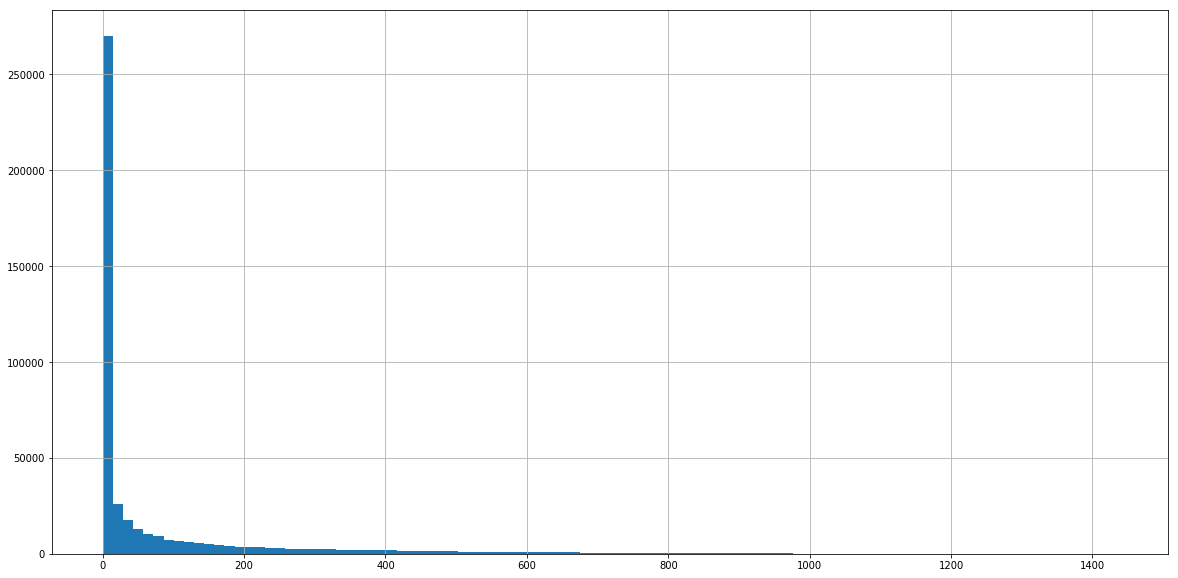

In [75]:
clicked_data.att_diff.astype(int).compute().hist(bins =100, figsize=(20,10))

In [80]:
clicked_data[clicked_data.att_diff==0].count().compute()

ip                 50305
app                50305
device             50305
os                 50305
channel            50305
click_time         50305
attributed_time    50305
is_attributed      50305
att_diff           50305
dtype: int64

In [5]:
from datetime import datetime
def tim_diff2(x):
    x2 = '2017-11-09 16:00:00'
    fmt = '%Y-%m-%d %H:%M:%S'
    tstamp1 = datetime.strptime(x, fmt)
    tstamp2 = datetime.strptime(x2, fmt)
    td = tstamp2 - tstamp1
    td_mins = int(round(td.total_seconds() / 60.))
    return td_mins

In [7]:
tim_diff2('2017-11-06 14:33:34')

4406

In [8]:
data['cuttoff_time'] = data.click_time.apply(tim_diff2,meta=('x', str)) 

In [9]:
data.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,cuttoff_time
1220047,121312,12,1,10,340,2017-11-09 16:00:00,NaN,0,0
1220048,46894,3,1,19,211,2017-11-09 16:00:00,NaN,0,0
1220049,320126,1,1,13,274,2017-11-09 16:00:00,NaN,0,0
1220050,189286,12,1,37,259,2017-11-09 16:00:00,NaN,0,0
1220051,106485,11,1,19,137,2017-11-09 16:00:00,NaN,0,0


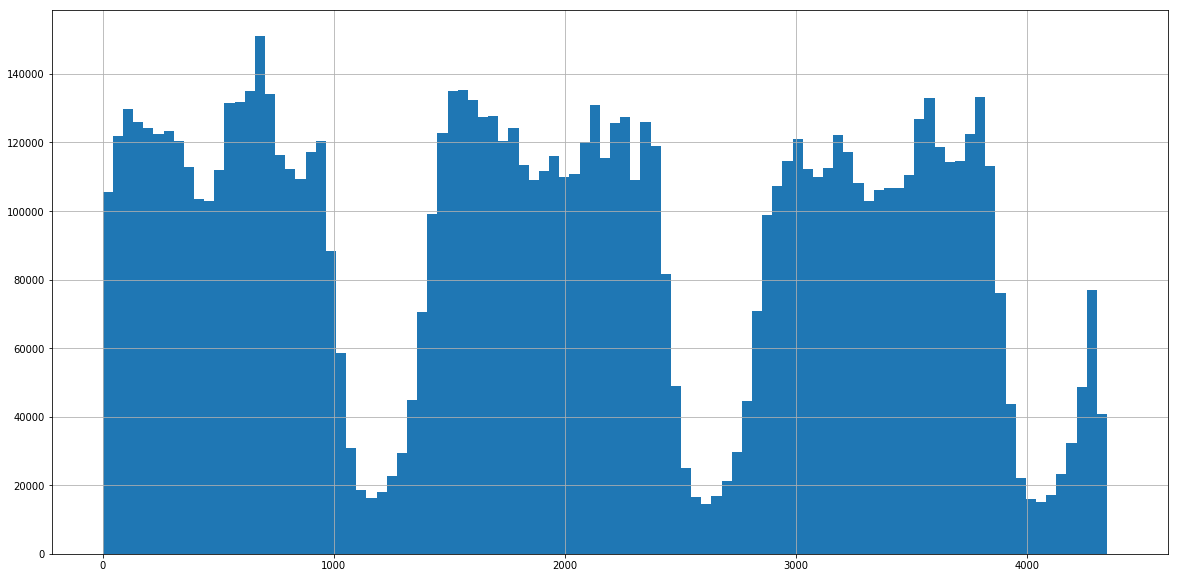

In [9]:
sam = data.sample(0.05).compute()
sam['cuttoff_time'] = sam.click_time.apply(tim_diff2)
sam.cuttoff_time.hist(bins=100, figsize=(20,10))

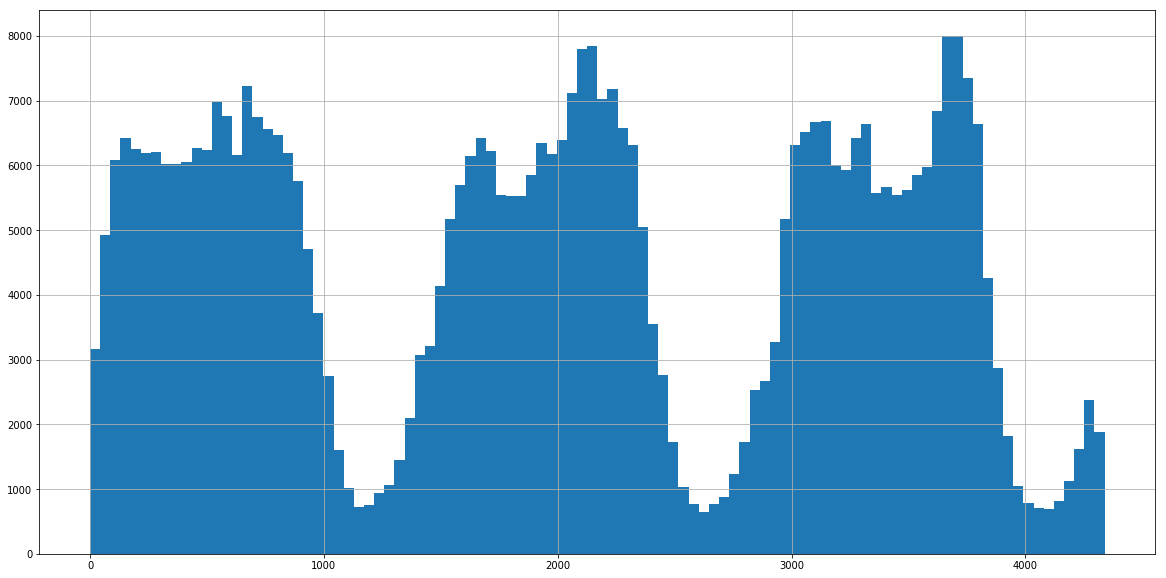

In [18]:
clicked_data['cuttoff_time'] = clicked_data.click_time.apply(tim_diff2,meta=('x', str))
clicked_data.cuttoff_time.compute().hist(bins=100, figsize=(20,10))

In [23]:
clicked_data['conv_diff'] = clicked_data.apply(tim_diff, axis=1,meta=('x', str))

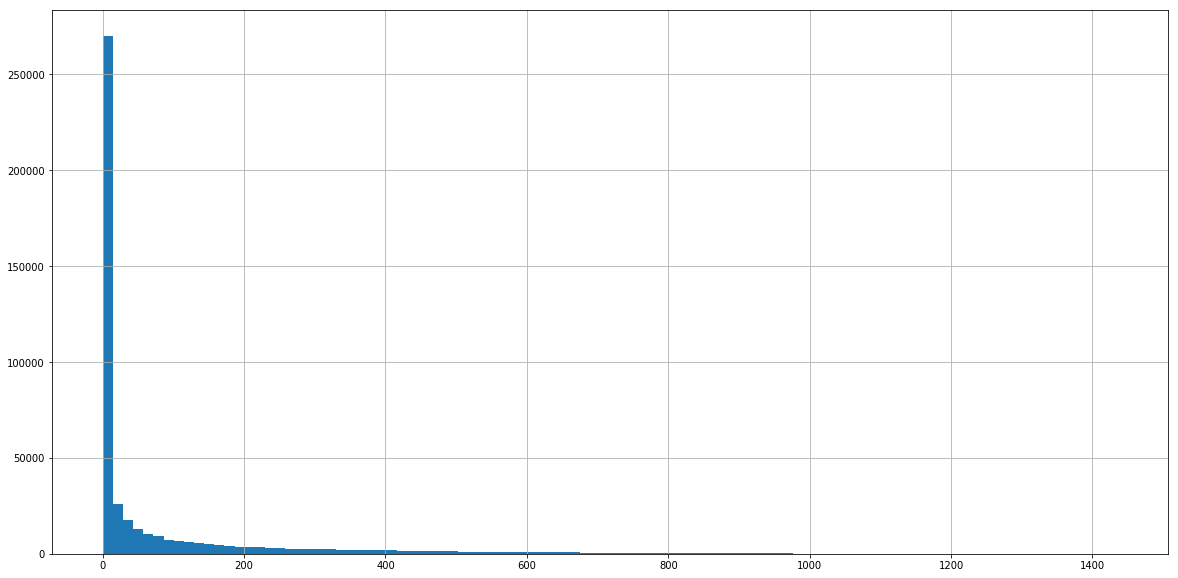

In [25]:
clicked_data.conv_diff.compute().hist(bins=100, figsize=(20,10))

### Important observations:
1. Most of the conversions are happening around 0-5 minutes after the ad was clicked
2. There are delayed conversions also happening.
3. For starting and ending day, all data is not available, so mean encoding is the way to go, or avoid the target encoding for the day.
Options:
1. remove the last 2 hours obeservation by click_time.

In [56]:
data.click_time.min().compute(), data.click_time.max().compute()

('2017-11-06 14:32:21', '2017-11-09 16:00:00')

In [55]:
clicked_data.click_time.min().compute(), clicked_data.click_time.max().compute() #'2017-11-06 15:41:07'

('2017-11-06 15:41:07', '2017-11-09 15:59:33')

In [53]:
clicked_data.attributed_time.min().compute(), clicked_data.attributed_time.max().compute()

('2017-11-06 16:00:47', '2017-11-09 16:00:00')

In [ ]:
len(data[data.cuttoff_time.astype(int)==0])

In [57]:
clicked_data.head(20)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,cuttoff_time,conv_diff
103,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1,4339,996
1504,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,1,4320,1085
1798,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,1,4320,461
2102,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,1,4320,535
3056,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,1,4320,425
3220,82917,19,0,24,210,2017-11-06 16:00:04,2017-11-07 00:21:50,1,4320,502
3939,126647,72,1,6,101,2017-11-06 16:00:05,2017-11-06 16:01:18,1,4320,1
5282,57546,29,1,41,213,2017-11-06 16:00:07,2017-11-06 16:03:51,1,4320,4
5377,189682,35,1,13,21,2017-11-06 16:00:07,2017-11-06 23:37:17,1,4320,457
5438,24200,19,88,24,213,2017-11-06 16:00:07,2017-11-07 04:18:51,1,4320,739


In [54]:
clicked_data.tail(20)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,cuttoff_time,conv_diff
1170915,339381,105,1,3,451,2017-11-09 15:58:56,2017-11-09 15:59:53,1,1,1
1171170,341549,19,6,29,213,2017-11-09 15:58:57,2017-11-09 15:59:35,1,1,1
1171428,324258,19,0,0,213,2017-11-09 15:58:57,2017-11-09 15:59:46,1,1,1
1175071,306090,10,1,27,113,2017-11-09 15:59:02,2017-11-09 15:59:35,1,1,1
1175157,350170,10,1,47,113,2017-11-09 15:59:02,2017-11-09 15:59:21,1,1,0
1175758,291188,10,1,61,113,2017-11-09 15:59:03,2017-11-09 15:59:35,1,1,1
1176461,318331,5,1,27,113,2017-11-09 15:59:04,2017-11-09 15:59:33,1,1,0
1178109,324883,45,1,58,419,2017-11-09 15:59:07,2017-11-09 15:59:16,1,1,0
1178641,310830,19,0,24,213,2017-11-09 15:59:07,2017-11-09 15:59:57,1,1,1
1178841,338843,5,1,37,113,2017-11-09 15:59:08,2017-11-09 15:59:36,1,1,0


In [41]:
non_clicked = data[data.is_attributed==0]

In [16]:
len(non_clicked)

3688946

In [42]:
non_clicked.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
1220047,121312,12,1,10,340,2017-11-09 16:00:00,NaN,0
1220048,46894,3,1,19,211,2017-11-09 16:00:00,NaN,0
1220049,320126,1,1,13,274,2017-11-09 16:00:00,NaN,0
1220050,189286,12,1,37,259,2017-11-09 16:00:00,NaN,0
1220051,106485,11,1,19,137,2017-11-09 16:00:00,NaN,0


In [38]:
data = data.repartition(npartitions=1)

In [39]:
data[data.is_attributed==1].tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
1188824,313982,10,1,27,113,2017-11-09 15:59:21,2017-11-09 15:59:53,1
1188859,331467,5,1,47,113,2017-11-09 15:59:21,2017-11-09 15:59:26,1
1193016,29789,45,1,32,419,2017-11-09 15:59:26,2017-11-09 15:59:42,1
1193244,308776,10,1,11,113,2017-11-09 15:59:26,2017-11-09 15:59:58,1
1198473,176331,9,1,19,127,2017-11-09 15:59:33,2017-11-09 15:59:59,1


In [37]:
all_sample_data = clicked_data.append(non_clicked)

In [ ]:
for c in all_sample_data.columns:
    print(c, np.sum(all_sample_data[c].isnull().compute()))

In [39]:
del clicked_data
del non_clicked

In [40]:
def get_date(x):
    td = str(x).strip().split(' ')
    if len(td)>0:
        return td[0]
def get_time(x):
    td = str(x).strip().split(' ')
    if len(td)>1:
        return td[1]

In [41]:
all_sample_data['date']=all_sample_data.click_time.apply(get_date, meta=('x', str))
all_sample_data['time']=all_sample_data.click_time.apply(get_time, meta=('x', str))
all_sample_data['a_date']=all_sample_data.attributed_time.apply(get_date, meta=('x', str))

In [44]:
all_sample_data.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,date,time,a_date
525446,112302,3,1,37,280,2017-11-09 15:44:31,NaN,0,2017-11-09,15:44:31,nan
885576,100203,18,1,10,107,2017-11-09 15:52:25,NaN,0,2017-11-09,15:52:25,nan
935535,261456,17,1,13,128,2017-11-09 15:53:31,NaN,0,2017-11-09,15:53:31,nan
1103407,2643,12,1,7,212,2017-11-09 15:57:23,NaN,0,2017-11-09,15:57:23,nan
998109,108077,9,1,3,107,2017-11-09 15:54:54,NaN,0,2017-11-09,15:54:54,nan


In [82]:
import datetime
def get_down(x):
    dt = datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%A')
    return dt
    
def get_hour(x):
    td = str(x).strip().split(':')
    if len(td)>0:
        return td[0]

In [47]:
all_sample_data.date.unique().compute()

0    2017-11-06
1    2017-11-07
2    2017-11-08
3    2017-11-09
Name: date, dtype: object

In [48]:
all_sample_data.a_date.unique().compute()

0    2017-11-07
1    2017-11-06
2    2017-11-08
3    2017-11-09
4           nan
Name: a_date, dtype: object

In [53]:
all_sample_data.down.unique().compute()

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
Name: down, dtype: object

In [83]:
all_sample_data['down']=all_sample_data.date.apply(get_down, meta=('x', str))
all_sample_data['hour']=all_sample_data.time.apply(get_hour, meta=('x', str))

In [55]:
all_sample_data_df = all_sample_data.drop(['click_time', 'date','time'], axis=1).compute()

In [110]:
type(all_sample_data_df.hour.iloc[0])

str

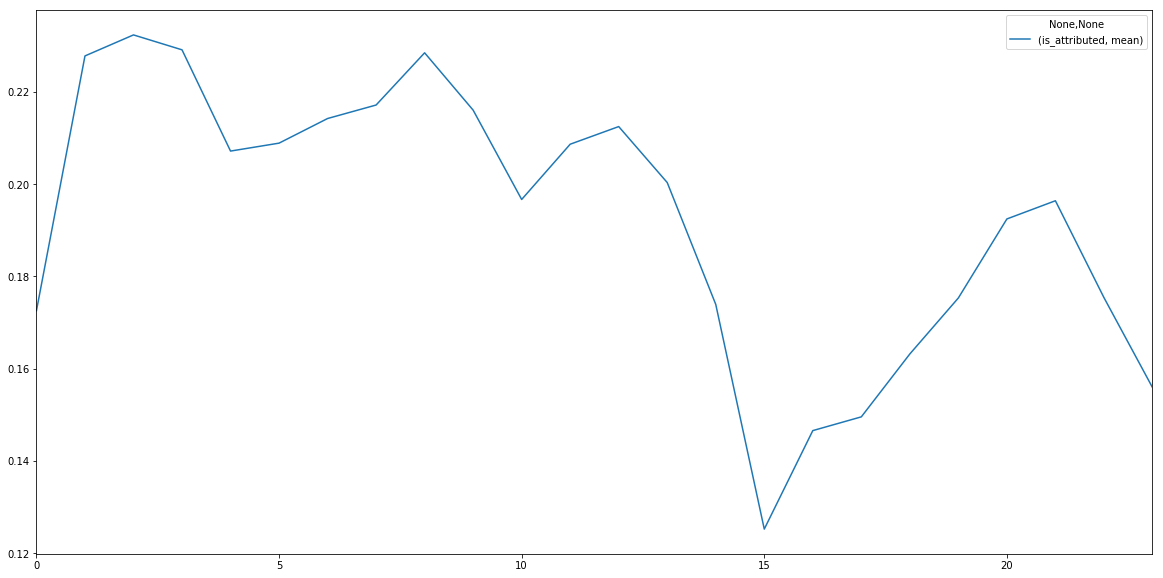

In [84]:
all_sample_data_df[['hour','is_attributed']].groupby('hour').agg(['mean']).reset_index().plot(figsize=(20,10))

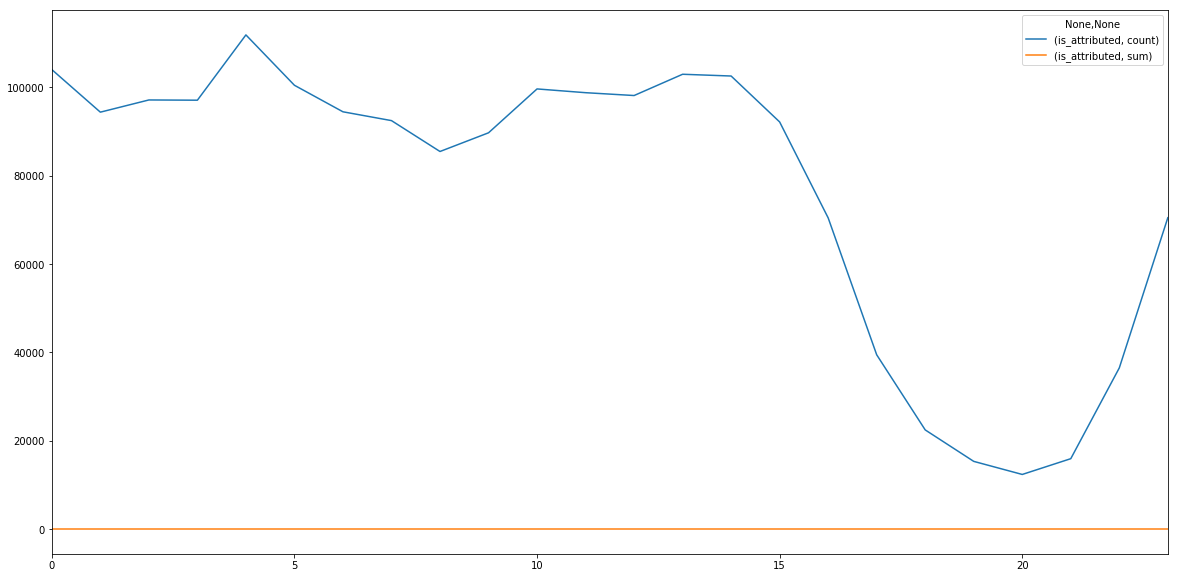

In [80]:
all_sample_data_df[all_sample_data_df.is_attributed==0][['hour','is_attributed']].groupby('hour').agg(['count','sum']).reset_index().plot(figsize=(20,10))

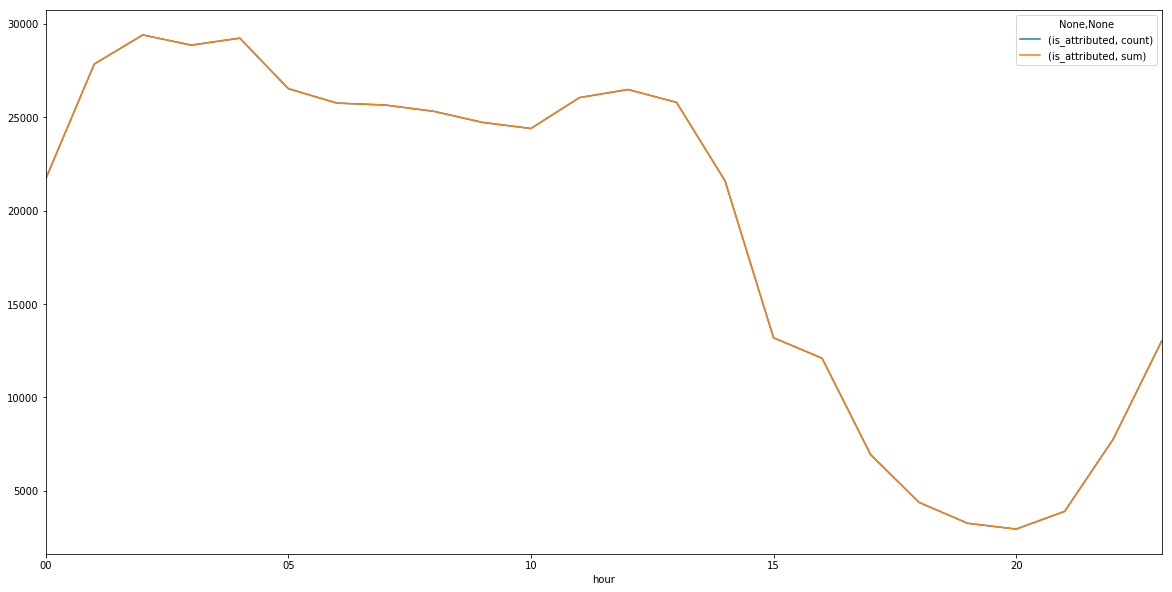

In [83]:
all_sample_data_df[all_sample_data_df.is_attributed==1][['hour','is_attributed']].groupby('hour').agg(['count','sum']).reset_index().plot(x='hour',figsize=(20,10))

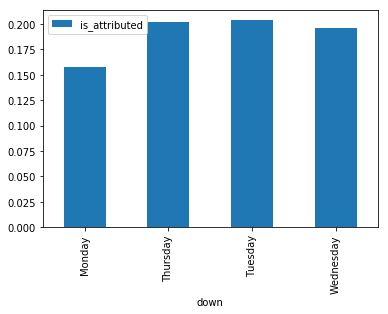

In [76]:
all_sample_data_df[['down','is_attributed']].groupby('down').agg('mean').reset_index().plot(x='down',y='is_attributed', kind='bar')

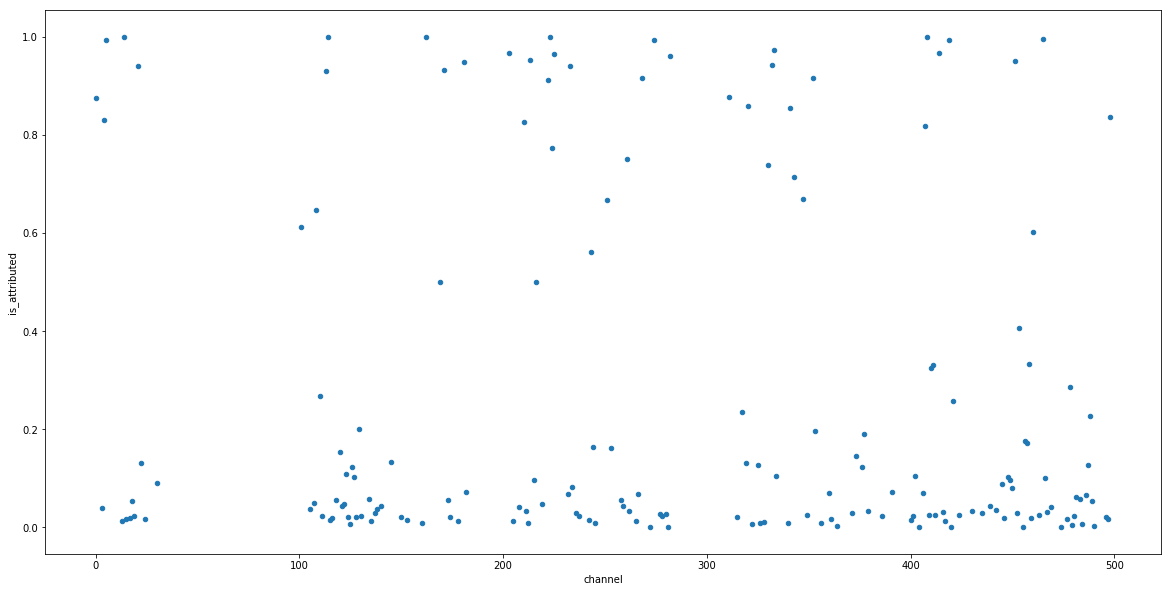

In [95]:
all_sample_data_df[['channel','is_attributed']].groupby('channel').agg(['mean']).reset_index().plot.scatter(x= 'channel',y='is_attributed',figsize=(20,10))

### Modelling

In [208]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [99]:
le=LabelEncoder()
le.fit(all_sample_data_df.down)
all_sample_data_df['dow']=le.transform(all_sample_data_df.down) 

In [111]:
all_sample_data_df.hour = all_sample_data_df.hour.apply(int)

In [112]:
cols = ['ip','app','device','os','channel','dow','hour']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(all_sample_data_df[cols], all_sample_data_df.is_attributed, test_size=0.20, random_state=17, stratify=all_sample_data_df.is_attributed)
gbm = lgb.LGBMClassifier(
                       objective='binary',
                        max_depth=9,
                        num_leaves=250,
                        min_child_samples= 100, 
                        min_data_in_leaf=20,
                        metric = ['auc'],
                        learning_rate=0.05,
                        verbose_eval=100, 
                        max_bin=100,
                        colsample_bytree=0.8,
                        subsample=0.8,
                        n_estimators=1000)



In [206]:
np.sum(y_test), np.sum(y_train)

(91369, 365477)

In [207]:
gbm.fit(X_train, y_train,eval_set=(X_test,y_test),eval_metric=['auc'],early_stopping_rounds=30, verbose=False)
print('train roc: ',roc_auc_score(y_train, gbm.predict_proba(X_train)[:,1]))
print('validation roc: ',roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))

train roc:  0.977296252502
validation roc:  0.971987146845


In [124]:
gbm.predict_proba(X_test)[:,1]

array([ 0.0649393 ,  0.01251817,  0.01847804, ...,  0.03510223,
        0.01530201,  0.14386546])

In [200]:
def get_fm(lgb_model):
    feature_imp = pd.DataFrame({'feature': cols,'imp':list(lgb_model.feature_importances_)})
    feature_imp.sort_values('imp', ascending=False, inplace=True)
    return feature_imp

In [201]:
get_fm(gbm)

,feature,imp
0,ip,24904
3,os,22997
4,channel,22010
6,hour,20386
1,app,19262
5,dow,7756
2,device,7199


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,date,time,a_date,down,hour
103,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1,2017-11-06,15:41:07,2017-11-07,None,15
1504,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,1,2017-11-06,16:00:02,2017-11-07,None,16
1798,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,1,2017-11-06,16:00:02,2017-11-06,None,16
2102,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,1,2017-11-06,16:00:03,2017-11-07,None,16
3056,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,1,2017-11-06,16:00:04,2017-11-06,None,16


In [84]:
all_sample_data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,date,time,a_date,down,hour
103,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1,2017-11-06,15:41:07,2017-11-07,Monday,15
1504,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,1,2017-11-06,16:00:02,2017-11-07,Monday,16
1798,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,1,2017-11-06,16:00:02,2017-11-06,Monday,16
2102,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,1,2017-11-06,16:00:03,2017-11-07,Monday,16
3056,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,1,2017-11-06,16:00:04,2017-11-06,Monday,16


In [85]:
all_sample_data_df=all_sample_data.drop(['click_time','attributed_time','time','date','a_date'],axis=1).compute()

In [87]:
all_sample_data_df.to_csv('all_sample_data.csv', index=False)

In [34]:
all_sample_data_df = pd.read_csv('all_sample_data.csv')

### Feature Engg

In [ ]:
# for hour, jobday, dow, street, cluster,
def reg_target_encoding(train, y, cols):
    train_new = train.copy()
    skf = StratifiedKFold(4, shuffle=True, random_state=12)
    for train_index, test_index in skf.split(train, y):
        Xtr, Xval = train.iloc[train_index], train.iloc[test_index]
        for col in cols:
            means = Xval[col].map(Xtr.groupby(col).is_attributed.mean())
            new_col_name='%s_mean_enc'%col
            Xval[new_col_name]= means
        train_new.iloc[test_index]= Xval
    
    
    temp = train.groupby(col)[target].sum()
    train[new_col_name]= train[col].map(temp)
    test[new_col_name]= test[col].map(temp)
    global_mean = train[target].sum()
    train[new_col_name] = train[new_col_name].fillna(global_mean)
    test[new_col_name] = test[new_col_name].fillna(global_mean)

reg_target_encoding(parking_records_train,parking_records_test, col = "dow")
reg_target_encoding(parking_records_train,parking_records_test, col = "utuple")
reg_target_encoding(parking_records_train,parking_records_test, col = "Street")
reg_target_encoding(parking_records_train,parking_records_test, col = "hour")
reg_target_encoding(parking_records_train,parking_records_test, col = "cluster_records")